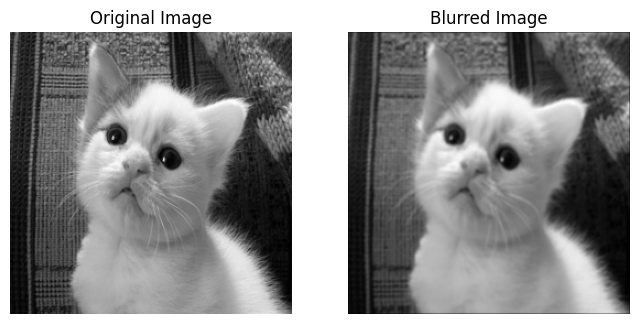

In [4]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load an image using PIL
image = Image.open("cat.jpg").convert('L')
image = image.resize((256,256))
image = np.array(image, dtype = np.float32)

# Add batch and channel dimensions (1, 256, 256, 1)
image = np.expand_dims(image, axis=(0,-1))


# Define a 3x3 blurring filter (averaging kernel)
blur_filter = np.array([[1/9, 1/9, 1/9],
                        [1/9, 1/9, 1/9],
                       [1/9,1/9,1/9]] , dtype = np.float32) 

# Reshape the filter for TensorFlow (H, W, in_channels, out_channels)
blur_filter = blur_filter.reshape(3,3,1,1)

# Apply convolution for blurring
blurred_img = tf.nn.conv2d(image, blur_filter, strides=[1,1,1,1], padding = "SAME")


# Convert tensor to numpy for visualization
blurred_img = blurred_img.numpy().squeeze()

# Plot original and blurred images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image.squeeze(), cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(blurred_img, cmap="gray")
plt.title("Blurred Image")
plt.axis("off")

plt.show()

